Examples of how to use the BCES fitting code
===================

In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
cd '/Users/nemmen/work/software/python/bces'

/Users/nemmen/Dropbox/work/software/python/bces


In [3]:
import bces
import seaborn

# Example 1

Data with errors in $x$ and $y$, no correlation between uncertainties

Reads data (real data taken from this [paper](http://science.sciencemag.org/content/338/6113/1445.full])). The [datafile](https://github.com/rsnemmen/BCES/blob/master/data.npz) is available in the github repository

In [4]:
data=load('data.npz')
xdata=data['x']
ydata=data['y']
errx=data['errx']
erry=data['erry']
cov=data['cov']

Fitting, results such that $y = Ax + B$. *covab* is the resulting covariance matrix which can be used to draw confidence regions.

You need to select the desired BCES method for plotting by setting the variable $i$ below. The possible values are 0:$y|x$, 1:$x|y$, 3:ort. 
*DO NOT USE THE BISSECTOR METHOD*. 
Please read the [original BCES paper](http://labs.adsabs.harvard.edu/adsabs/abs/1996ApJ...470..706A/) to understand what they mean.

In [5]:
# Selects the desired BCES method for plotting
i=3 

# number of bootstrapping trials
nboot=10000

In [6]:
%%time
# Performs the BCES fit (parallel)
a,b,erra,errb,covab=bces.bcesp(xdata,errx,ydata,erry,cov,nboot)

BCES, 10000 trials...  3.484534 s
CPU times: user 16.7 ms, sys: 20.8 ms, total: 37.5 ms
Wall time: 3.48 s


Plot

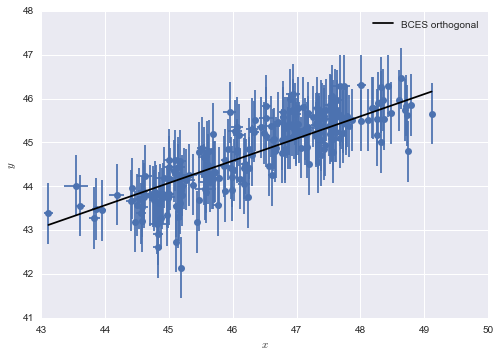

In [7]:
errorbar(xdata,ydata,xerr=errx,yerr=erry,fmt='o')
x=numpy.linspace(xdata.min(),xdata.max())
plot(x,a[i]*x+b[i],'-k',label="BCES orthogonal")
legend(loc='best')
xlabel('$x$')
ylabel('$y$')

# Example 2

Fake data with random uncertainties in $x$ and $y$. Example prepared by Rogerio Riffel.

Prepares fake data

In [8]:
x=np.arange(1,20)
y=3*x + 4

xer=np.sqrt((x- np.random.normal(x))**2)
yer=np.sqrt((y- np.random.normal(y))**2)

# reescrevendo x e y para serem random
y=numpy.random.normal(y)
x=numpy.random.normal(x)

In [9]:
# simple linear regression
(aa,bb)=numpy.polyfit(x,y,deg=1)
yfit=x*aa+bb

# BCES fit
cov=zeros(len(x))   # no correlation between error measurements
nboot=10000   # number of bootstrapping trials
a,b,aerr,berr,covab=bces.bcesp(x,xer,y,yer,cov,nboot)
ybces=a[0]*x+b[0]  # the integer corresponds to the desired BCES method for plotting (3-ort, 0-y|x, 1-x|y, *don't use bissector*)

BCES, 10000 trials...  2.978093 s


Plot

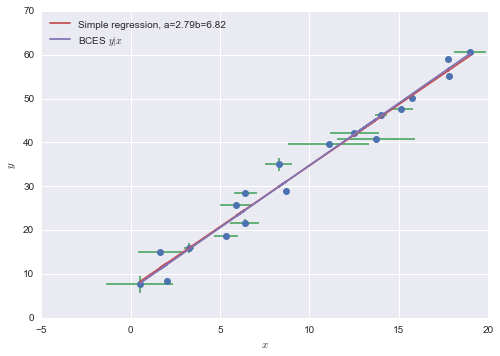

In [10]:
plot(x,y,'o')
errorbar(x,y,xer,yer,ls='None')
plot(x,yfit,label='Simple regression, a={:.2F}'.format(aa)+'b={:.2F}'.format(bb))
plot(x,ybces,label='BCES $y|x$')
legend(loc='best')
xlabel('$x$')
ylabel('$y$')

# TODO

* include example showing use of confidence contours in fit ("bowtie" plot)